In [1]:
from models.Unet import UNet
from dataset.data import BatchMaker
from utils.metrics import SegmentationMetrics
import torch
import yaml
import numpy as np
import matplotlib.pyplot as plt



In [2]:
BATCH = 1
path_to_config = '/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Kod/config/config_lab.yaml'
with open(path_to_config, 'r') as config_file:
    config = yaml.safe_load(config_file)
model_path = config['save_model_path'] + '/mixedGT1_best_model'


annotator1 = BatchMaker(config_path=path_to_config, batch_size=BATCH, mode = 'all',segment = 'mixed',annotator= 1)
train_GT1 = annotator1.train_loader
annotator2 = BatchMaker(config_path=path_to_config, batch_size=BATCH, mode = 'all',segment = 'mixed',annotator= 2)
train_GT2 = annotator2.train_loader

/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test_small
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test_small
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test


(432, 512, 512, 4)
IoU scores for each class: [0.997504947087671, 0.13066666666666665, 0.5490566037735849, 0]
Mean IoU score: 0.22657442348008386
Accuracy: 0.9974772135416666
Precision: [0.9985992429565493, 0.3828125, 0.631236442516269, 0]
Recall: [0.99890263367917, 0.16554054054054054, 0.8083333333333333, 0]
F1: [0.9987509152775983, 0.2311320754716981, 0.7088915956151035, 0]
Dice: [0.9987509152775983, 0.23113207547169812, 0.7088915956151035, 0]


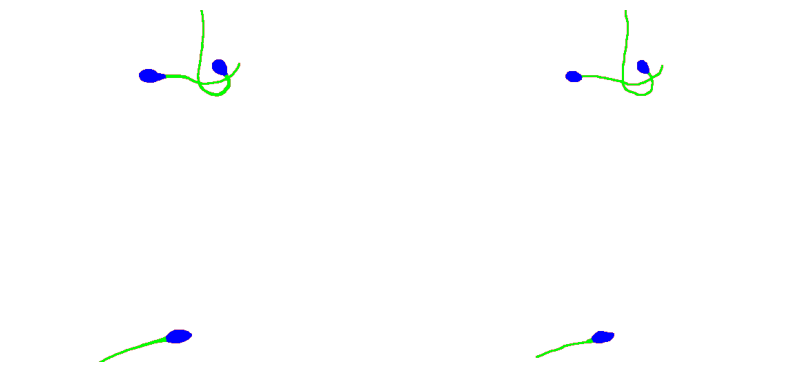

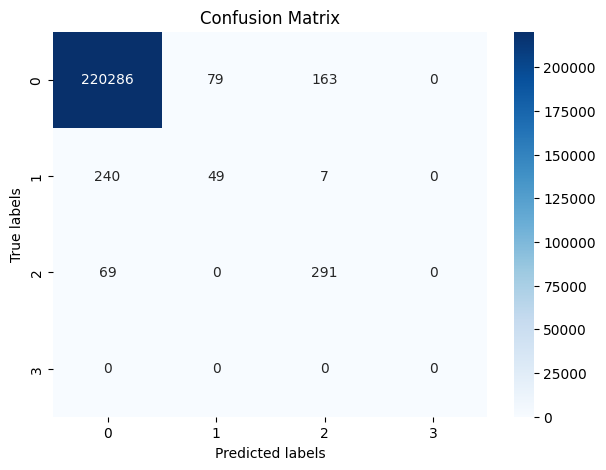

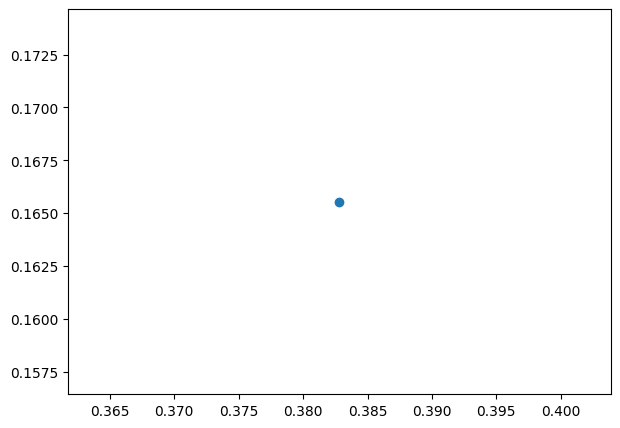

In [15]:
from sklearn.metrics import (
    jaccard_score,
    average_precision_score
)
from utils.metrics import SegmentationMetrics
import seaborn as sns
from sklearn.metrics import average_precision_score


input_images = []
class_masks = []
true_masks = []  

input_images1 = []
class_masks1 = []
true_masks1 = []  
all_true_class_ids = []
all_pred_class_ids = []


for inputs,ids in train_GT1:
    input_images.append(inputs) 
    class_masks.append(ids)

input_images = np.concatenate(input_images, axis=0)
class_masks = np.concatenate(class_masks, axis=0) 


for inputs, ids in train_GT2:
    input_images1.append(inputs)
    class_masks1.append(ids)

input_images1 = np.concatenate(input_images1, axis=0)
class_masks1 = np.concatenate(class_masks1, axis=0) 

#input_images1 = input_images1.transpose((0, 2, 3, 1))

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(class_masks[2])
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(class_masks1[2])
plt.axis('off')


metrics = SegmentationMetrics(4)
metrics.update_confusion_matrix(class_masks, class_masks1)
iou_per_class = metrics.calculate_iou_per_class()
mean_iou = metrics.mean_iou()
accuracy = metrics.calculate_accuracy()
cnfMatrix = metrics.confusion_matrix
precision,recall,f1 = metrics.calculate_precision_recall_f1_per_class()
dice = metrics.calculate_dice_score_per_class()
print("IoU scores for each class:", iou_per_class)
print("Mean IoU score:", mean_iou)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("Dice:", dice)


plt.figure(figsize=(7,5))  
sns.heatmap(cnfMatrix, annot=True, fmt=".0f", cmap='Blues')  # Format numbers
plt.title('Confusion Matrix')  
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

plt.figure(figsize=(7,5))
plt.plot(precision[1],recall[1], 'o', label='class 1')






In [26]:
from sklearn.metrics import jaccard_score

# Calculate IoU (Jaccard score) for each class
ious = []
for c in range(class_masks.shape[-1]):
    iou = jaccard_score(class_masks[..., c].flatten(), class_masks1[..., c].flatten())
    ious.append(iou)

# Now ious contains the IoU for each class
for i, iou in enumerate(ious):
    print(f"IoU for class {i}: {iou}")

# If you want the mean IoU across all classes
mean_iou = np.mean(ious)
print("Mean IoU across all classes:", mean_iou)

KeyboardInterrupt: 

In [29]:
classs = 3
iou = jaccard_score(class_masks[0,..., classs].flatten(), class_masks1[0,..., classs].flatten())
print(iou)
iou2 = calculate_iou(class_masks[0,..., classs], class_masks1[0,..., classs])
print(iou2)

0.36033274956217165
0.36033274956217165


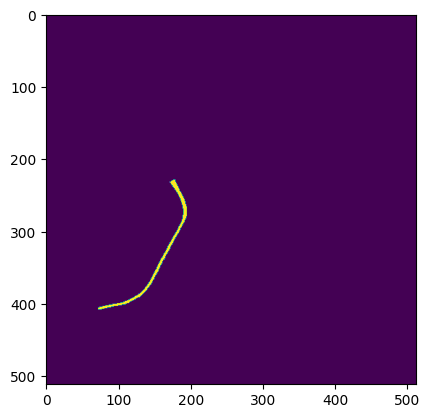

In [24]:
plt.imshow(class_masks[0,..., 1])

In [25]:
def calculate_iou(y_true, y_pred):
    # Flatten the arrays
    y_true = y_true.reshape(-1)
    y_pred = y_pred.reshape(-1)

    # Calculate intersection and union
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()

    # Calculate IoU
    iou = intersection / union

    return iou

# Calculate IoU for each class
ious = []
for c in range(class_masks.shape[-1]):
    iou = calculate_iou(class_masks[..., c], class_masks1[..., c])
    ious.append(iou)

# Now ious contains the IoU for each class
for i, iou in enumerate(ious):
    print(f"IoU for class {i}: {iou}")

# If you want the mean IoU across all classes
mean_iou = np.mean(ious)
print("Mean IoU across all classes:", mean_iou)

IoU for class 0: 0.9939750840052808
IoU for class 1: 0.3689429403379839
IoU for class 2: 0.722969509149901
IoU for class 3: 0.5341894060995185
Mean IoU across all classes: 0.655019234898171


In [37]:
from sklearn.metrics import confusion_matrix

# Initialize a confusion matrix for all classes
total_confusion_matrix = np.zeros((class_masks.shape[-1], class_masks.shape[-1]))

# Calculate confusion matrix for each class
for c in range(class_masks.shape[-1]):
    y_true = class_masks[..., c].flatten()
    y_pred = class_masks1[..., c].flatten()
    
    # Get unique classes and their counts
    unique_classes, counts = np.unique(np.concatenate([y_true, y_pred]), return_counts=True)
    
    # Calculate confusion matrix for the current class
    cm_current = confusion_matrix(y_true, y_pred, labels=unique_classes)
    
    # Create a full confusion matrix and fill in the values from cm_current
    cm_full = np.zeros((class_masks.shape[-1], class_masks.shape[-1]))
    for idx, cls in enumerate(unique_classes):
        cm_full[cls] += cm_current[idx]
    
    # Add the full confusion matrix to the total confusion matrix
    total_confusion_matrix += cm_full

print("Confusion matrix:\n", total_confusion_matrix)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [36]:
def create_confusion_matrix(y_true, y_pred, num_classes):
    # Initialize the confusion matrix
    confusion_matrix = np.zeros((num_classes, num_classes))

    # Iterate over each pixel
    for i in range(512):
        for j in range(512):
            # Get the true and predicted class for this pixel
            true_class = np.argmax(y_true[:,i, j])
            pred_class = np.argmax(y_pred[:,i, j])

            # Update the confusion matrix
            confusion_matrix[true_class, pred_class] += 1

    return confusion_matrix

# Create confusion matrix for class_masks and class_masks1
confusion_matrix = create_confusion_matrix(class_masks, class_masks1, class_masks.shape[-1])

print("Confusion matrix:\n", confusion_matrix)

Confusion matrix:
 [[2.5986e+05 6.1800e+02 8.8000e+01 0.0000e+00]
 [6.6100e+02 2.9200e+02 4.0000e+01 0.0000e+00]
 [9.4000e+01 0.0000e+00 4.9100e+02 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]]


In [65]:
import numpy as np

def simple_iou(y_true, y_pred):
     # Flatten the arrays
    y_true = y_true.reshape(-1)
    y_pred = y_pred.reshape(-1)

    # Calculate intersection and union
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()

    # Calculate IoU
    iou = intersection / union

    return iou

def iou_per_class(y_true, y_pred, num_classes):
    iou_scores = []
    for c in range(num_classes):
        iou = simple_iou(y_true[..., c], y_pred[..., c])
        iou_scores.append(iou)
    return iou_scores

def mean_iou(y_true, y_pred, num_classes):
    return np.mean(iou_per_class(y_true, y_pred, num_classes)[1:3])



In [66]:

iou = iou_per_class(class_masks[..., c], class_masks1[..., c], class_masks.shape[-1])
meanIou = mean_iou(class_masks, class_masks1, class_masks.shape[-1])
print(ious)
print(meanIou)

[0.9939750840052808, 0.3689429403379839, 0.722969509149901, 0.5341894060995185]
0.5459562247439425
